# Importation des dépendances

In [22]:
# Installer les bibliothèques nécessaires
%pip install scikit-learn matplotlib pillow

# Importer les bibliothèques
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from PIL import Image


Note: you may need to restart the kernel to use updated packages.


# Déclaration des dossiers d'entrainement et de test

Ces 2 dossiers contiennent des images de pions de jeu d'échecs, les images sont différentes entre le dossier "/Train" et "/Test"
<br />
Le but est que les images soient différentes pour vérifier si le modèle a bien appris

In [23]:
base_dir = os.path.abspath('./ChessDataset')    # Répertoire de la base de données
train_dir = os.path.join(base_dir, 'Train')     # Répertoire de l'ensemble d'entraînement
test_dir = os.path.join(base_dir, 'Test')       # Répertoire de l'ensemble de test

In [24]:
# Fonction pour charger les images et les étiquettes
def load_data(data_dir):
    images = []
    labels = []
    class_names = os.listdir(data_dir)
    for class_name in class_names:
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                img = Image.open(img_path).convert('RGB')           # Ouvrir l'image et convertir en RGB
                img = img.resize((150, 150))                        # Redimensionner l'image en 150x150
                img_array = np.array(img)                           # Convertir l'image en tableau 3D (H x W x Couleur)
                images.append(img_array)                            # Ajouter l'image au tableau des images
                labels.append(class_name)                           # Ajouter l'étiquette au tableau des étiquettes
    return np.array(images), np.array(labels), class_names          # Retourner les images, les étiquettes et les noms de classes

In [25]:
X_train, y_train, class_names = load_data(train_dir)
X_test, y_test, _ = load_data(test_dir)

# Division des données en ensembles d'entraînement et de validation

Pour évaluer les performances du modèle de manière fiable, il est important de diviser les données en ensembles d'entraînement et de validation. Cela permet de s'assurer que le modèle est capable de généraliser à des données qu'il n'a pas vues pendant l'entraînement.


J'utilise la fonction `train_test_split` de sklearn pour diviser les données d'entraînement en deux ensembles : un ensemble d'entraînement et un ensemble de validation. Voici comment cela est fait :


In [26]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

Normaliser les données :

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: Found array with dim 4. StandardScaler expected <= 2.

## Création du ChessModel avec MLPClassifier

In [ ]:
lr = 0.0001              # Taux d'apprentissage (learning rate)
num_images = 15         # Nombre d'images à afficher pour la démonstration
max_iter = 1000         # Nombre d'itérations maximales (pour le MLP, sklearn s'arrête avant si la convergence est atteinte)
alpha = 1e-4            # Paramètre de régularisation (pour le MLP) 
solver = 'sgd'          # Algorithme d'optimisation (pour le MLP)

In [ ]:
ChessModel = MLPClassifier(hidden_layer_sizes=(512, 256, 128), max_iter=max_iter, alpha=alpha,
                           solver=solver, verbose=10, random_state=1,
                           learning_rate_init=lr)

# Entraîner le modèle

In [ ]:
ChessModel.fit(X_train_scaled, y_train)

Iteration 1, loss = 2.05138931
Iteration 2, loss = 1.86437754
Iteration 3, loss = 1.77565502
Iteration 4, loss = 1.72472200
Iteration 5, loss = 1.65451413
Iteration 6, loss = 1.59306908
Iteration 7, loss = 1.53806513
Iteration 8, loss = 1.48485837
Iteration 9, loss = 1.43745624
Iteration 10, loss = 1.39837231
Iteration 11, loss = 1.36085217
Iteration 12, loss = 1.32161330
Iteration 13, loss = 1.29016491
Iteration 14, loss = 1.25200197
Iteration 15, loss = 1.22300136
Iteration 16, loss = 1.19291314
Iteration 17, loss = 1.16533784
Iteration 18, loss = 1.13845515
Iteration 19, loss = 1.11302150
Iteration 20, loss = 1.09062008
Iteration 21, loss = 1.07023269
Iteration 22, loss = 1.04687087
Iteration 23, loss = 1.02748287
Iteration 24, loss = 1.00534351
Iteration 25, loss = 0.98551016
Iteration 26, loss = 0.97613758
Iteration 27, loss = 0.95451325
Iteration 28, loss = 0.93638255
Iteration 29, loss = 0.92088633
Iteration 30, loss = 0.90545122
Iteration 31, loss = 0.89238404
Iteration 32, los

C:\Users\matis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(hidden_layer_sizes=(512, 256, 128), learning_rate_init=0.0001,
              max_iter=1000, random_state=1, solver='sgd', verbose=10)

# Evaluer

In [ ]:
# Évaluer le modèle sur l'ensemble de validation
y_val_pred = ChessModel.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(classification_report(y_val, y_val_pred, target_names=class_names))

# Évaluer le modèle sur l'ensemble de test
y_test_pred = ChessModel.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(classification_report(y_test, y_test_pred, target_names=class_names))


Validation Accuracy: 0.1518
              precision    recall  f1-score   support

    Cavalier       0.00      0.00      0.00        21
         Fou       0.15      1.00      0.26        17
        Pion       0.00      0.00      0.00        22
       Reine       0.00      0.00      0.00        16
         Roi       0.00      0.00      0.00        15
        Tour       0.00      0.00      0.00        21

    accuracy                           0.15       112
   macro avg       0.03      0.17      0.04       112
weighted avg       0.02      0.15      0.04       112



C:\Users\matis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\matis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\matis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Test Accuracy: 0.1296
              precision    recall  f1-score   support

    Cavalier       0.00      0.00      0.00        71
         Fou       0.13      1.00      0.23        67
        Pion       0.00      0.00      0.00       239
       Reine       0.00      0.00      0.00        34
         Roi       0.00      0.00      0.00        34
        Tour       0.00      0.00      0.00        72

    accuracy                           0.13       517
   macro avg       0.02      0.17      0.04       517
weighted avg       0.02      0.13      0.03       517



C:\Users\matis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\matis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\matis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

# Fonction pour afficher les images et les prédictions


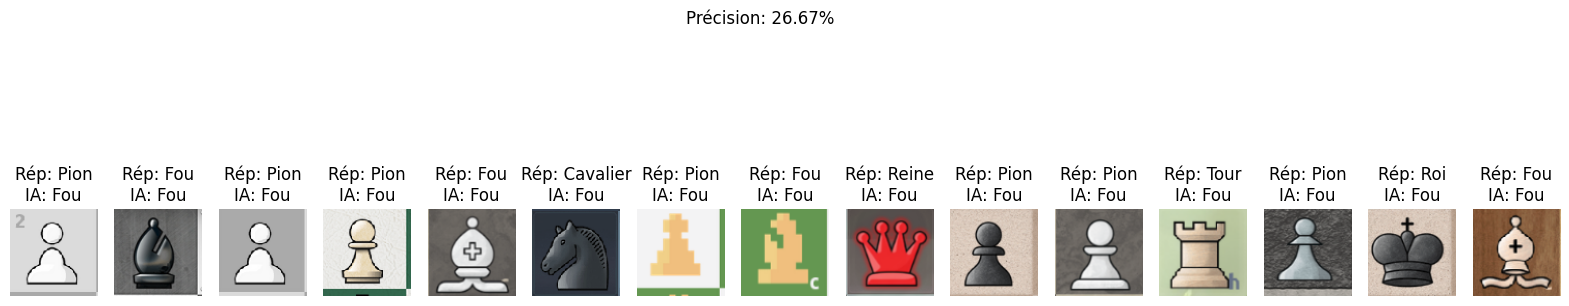

In [ ]:
# Fonction pour afficher les images et les prédictions
def display_predictions(model, test_dir, num_images):
    test_images = []
    test_labels = []
    for class_name in os.listdir(test_dir):
        class_path = os.path.join(test_dir, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                test_images.append(img_path)
                test_labels.append(class_name)

    indices = np.random.choice(len(test_images), num_images, replace=False)
    
    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
    correct_predictions = 0
    for ax, i in zip(axes, indices):
        img_path = test_images[i]
        true_label = test_labels[i]
        img = Image.open(img_path).convert('RGB')
        img_resized = img.resize((150, 150))
        img_array = np.array(img_resized).flatten().reshape(1, -1)
        
        prediction = model.predict(img_array)
        predicted_label = prediction[0]

        if predicted_label == true_label:
            correct_predictions += 1

        ax.imshow(img)
        ax.set_title(f"Rép: {true_label}\nIA: {predicted_label}")
        ax.axis('off')

    accuracy = (correct_predictions / num_images) * 100
    plt.suptitle(f"Précision: {accuracy:.2f}%")
    plt.show()

# Afficher les prédictions pour quelques images de test
display_predictions(ChessModel, test_dir, num_images)

# Arbre de décision
On peut s'imaginer comment notre model à réfléchi pour procédé à ce resultat. Pour cela on peut s'aider d'un arbre de décision pour comprendre son raisonnement

In [ ]:
# Entraîner un arbre de décision
tree_Chessmodel = DecisionTreeClassifier(random_state=42)
tree_Chessmodel.fit(X_train, y_train)

# Évaluer l'arbre de décision sur l'ensemble de test
y_test_pred_tree = tree_Chessmodel.predict(X_test)
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)
print(f'Test Accuracy (Decision Tree): {test_accuracy_tree:.4f}')
print(classification_report(y_test, y_test_pred_tree, target_names=class_names))

# Visualiser l'arbre de décision
plt.figure(figsize=(200, 100), dpi=100)
plot_tree(tree_Chessmodel, filled=True, feature_names=None, class_names=class_names, rounded=True)
plt.show()

Test Accuracy (Decision Tree): 0.1586
              precision    recall  f1-score   support

    Cavalier       0.19      0.31      0.23        71
         Fou       0.12      0.16      0.14        67
        Pion       0.56      0.12      0.19       239
       Reine       0.06      0.12      0.08        34
         Roi       0.05      0.09      0.06        34
        Tour       0.10      0.19      0.14        72

    accuracy                           0.16       517
   macro avg       0.18      0.17      0.14       517
weighted avg       0.32      0.16      0.17       517

